Analisar as maiores montanhas do mundo de acordo com dados do Wikipedia


In [2]:
import pandas as pd
df = pd.read_csv("c1_mountains.csv")

In [3]:
df.head(3)

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0


In [4]:
df.set_index("Mountain", inplace=True)

In [5]:
df.drop(["Rank", "Height (ft)", "Coordinates", "Parent mountain"], axis=1, inplace=True)

In [6]:
df.head(3)

,Height (m),Prominence (m),Range,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,,
Mount Everest / Sagarmatha / Chomolungma,8848,8848,Mahalangur Himalaya,1953,>>145,121.0
K2 / Qogir / Godwin Austen,8611,4017,Baltoro Karakoram,1954,45,44.0
Kangchenjunga,8586,3922,Kangchenjunga Himalaya,1955,38,24.0


In [7]:
df.drop(["Mount Everest / Sagarmatha / Chomolungma", "Muztagh Ata"], axis=0, inplace=True)
df.head(3)

,Height (m),Prominence (m),Range,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,,
K2 / Qogir / Godwin Austen,8611,4017,Baltoro Karakoram,1954,45,44.0
Kangchenjunga,8586,3922,Kangchenjunga Himalaya,1955,38,24.0
Lhotse,8516,610,Mahalangur Himalaya,1956,26,26.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, K2 / Qogir / Godwin Austen to Lupghar Sar
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Height (m)                 116 non-null    int64  
 1   Prominence (m)             116 non-null    int64  
 2   Range                      116 non-null    object 
 3   First ascent               116 non-null    object 
 4   Ascents bef. 2004          114 non-null    object 
 5   Failed attempts bef. 2004  114 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 6.3+ KB


In [10]:
df.dropna(inplace=True)

Analisando os Dados

In [11]:
df = pd.read_csv("Mountains_Cleaned.csv")

In [12]:
df["Total attempts"] = df["Ascents bef. 2004"] + df["Failed attempts bef. 2004"]

In [13]:
df["Success rate"] = (df["Ascents bef. 2004"] / df["Total attempts"]) * 100

In [14]:
df["Difficulty"] = (df["Total attempts"] / df["Success rate"]) *100

In [15]:
df["Difficulty"] = df["Difficulty"] / df["Difficulty"].max()

In [16]:
df = df.sort_values(by="Difficulty", ascending=False)

In [17]:
df.head()

,Mountain,Height (m),Prominence (m),Range,First ascent,Ascents bef. 2004,Failed attempts bef. 2004,Total attempts,Success rate,Difficulty
7,Nanga Parbat,8126,4608,Nanga Parbat Himalaya,1953,52,67,119,43.697479,1.000000
3,Makalu,8485,2386,Mahalangur Himalaya,1955,45,52,97,46.391753,0.767786
8,Annapurna I,8091,2984,Annapurna Himalaya,1950,36,47,83,43.373494,0.702689
6,Manaslu,8163,3092,Manaslu Himalaya,1956,49,45,94,52.127660,0.662169
0,K2 / Qogir / Godwin Austen,8611,4017,Baltoro Karakoram,1954,45,44,89,50.561798,0.646364


Analisar com Bar Plots

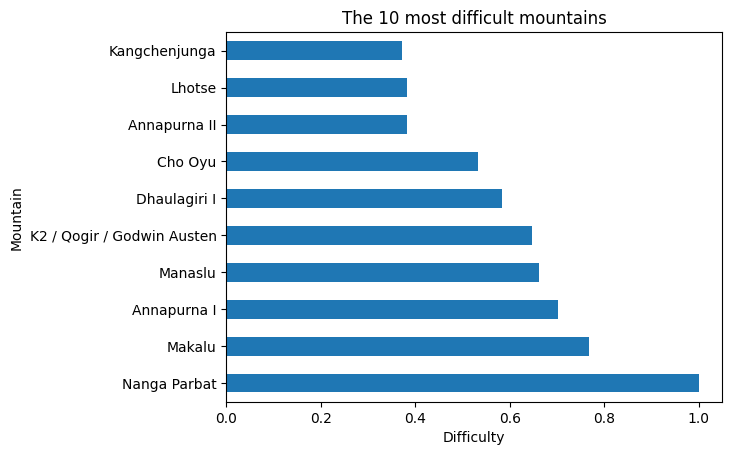

In [18]:
import matplotlib.pyplot as plt

df = df.reset_index().set_index("Mountain")
values = df[0:10]["Difficulty"]
bar_plot = values.plot.barh()

#add titles to the plot
bar_plot.set_title("The 10 most difficult mountains")
bar_plot.set_xlabel("Difficulty")
plt.show()

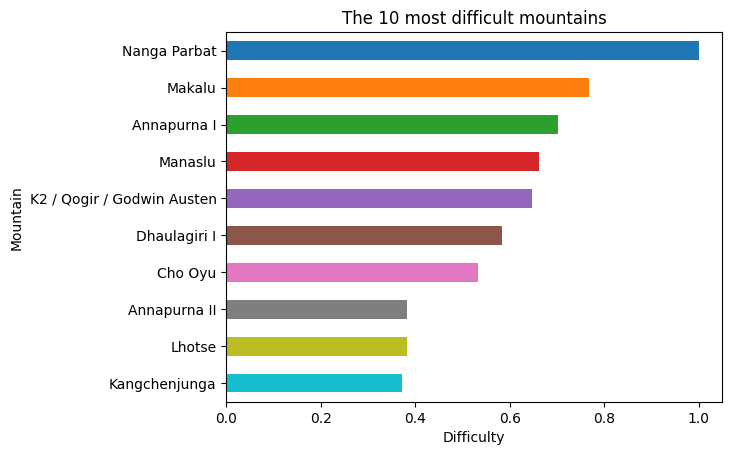

In [19]:
#add colors
colormap = plt.cm.tab10(range(0, len(values)))
bar_plot = values.plot.barh(color=colormap)

#add titles to the plot
bar_plot.set_title("The 10 most difficult mountains")
bar_plot.set_xlabel("Difficulty")

#to show the most difficult in the top
bar_plot.invert_yaxis()
plt.show()

Histogramas

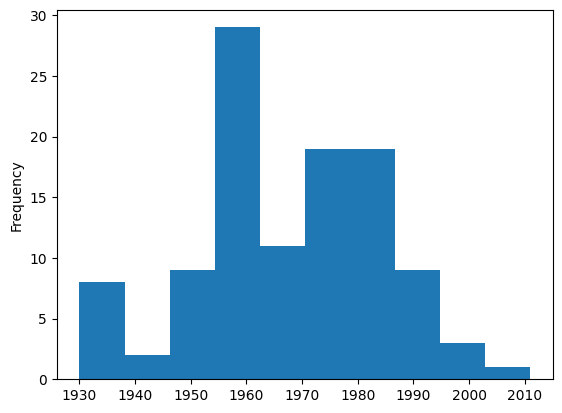

In [20]:
df["First ascent"].plot.hist()
plt.show()

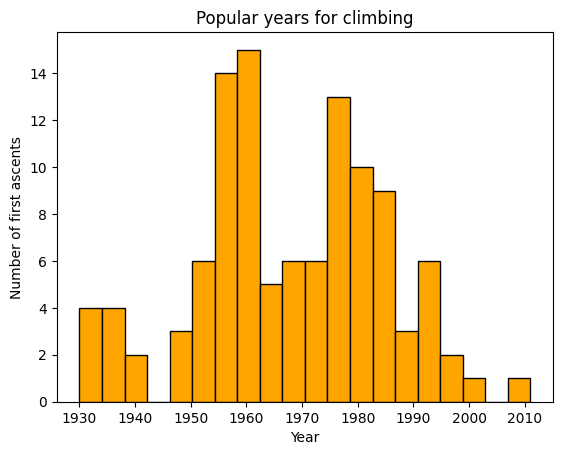

In [21]:
hist = df["First ascent"].plot.hist(bins=20, color="orange", edgecolor="black")
hist.set_xlabel("Year")
hist.set_ylabel("Number of first ascents")
hist.set_title("Popular years for climbing")
plt.show()

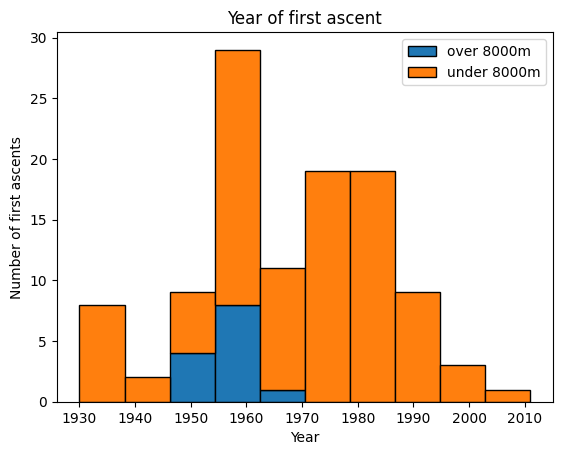

In [22]:
high = df["Height (m)"]>8000
plt.hist(
    [df.loc[high,"First ascent"],df.loc[~high,"First ascent"]],
    stacked=True,
    edgecolor="black",
)
plt.legend(["over 8000m", "under 8000m"], loc="upper right")
plt.xlabel("Year")
plt.ylabel("Number of first ascents")
plt.title("Year of first ascent")
plt.show()

Scatterplots

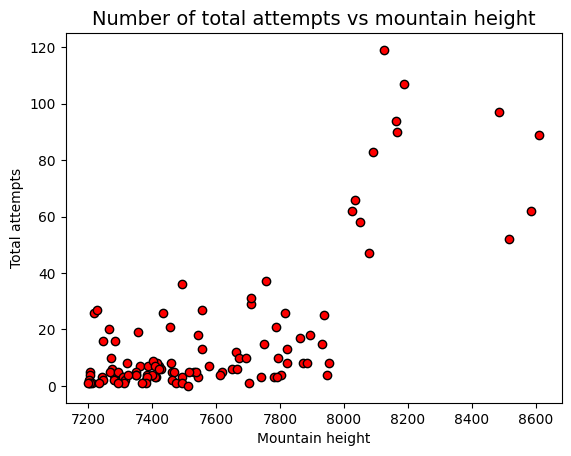

In [23]:
plt.scatter(df["Height (m)"], df["Total attempts"], color="red", edgecolor="black")
plt.ylabel("Total attempts")
plt.xlabel("Mountain height")
plt.title("Number of total attempts vs mountain height", fontsize=14)
plt.show()